In [1]:
import pandas as pd
df = pd.read_csv('footfall_735.csv')

In [2]:
df.head()

,DATE,day,month,bogo,paneer,guest,test,meal_type,footfall,max_possible_footfall
0,7/29/2023,Saturday,July,0,0,0,0,Dinner,48,89
1,8/21/2023,Monday,August,0,1,1,0,Breakfast,307,325
2,5/16/2023,Tuesday,May,0,0,0,0,Dinner,181,225
3,6/8/2023,Thursday,June,0,0,0,0,Dinner,80,120
4,8/7/2023,Monday,August,0,1,0,0,Dinner,52,100


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
#file_path = '/mnt/data/footfall_735.csv'
#df = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column as it is just an index
# Prepare the data for the model
X = df.drop('footfall', axis=1)
X = df.drop('DATE',axis=1)
y = df['footfall']

# Handling categorical variables
categorical_features = ['day', 'month', 'meal_type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine categorical and numerical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(preprocessor.fit_transform(X_train))
X_test = scaler.transform(preprocessor.transform(X_test))

# Building the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss on Test Data: {loss}')


Epoch 1/20
19/19 [==============================] - 1s 1ms/step - loss: 41624.7734
Epoch 2/20
19/19 [==============================] - 0s 889us/step - loss: 41082.3750
Epoch 3/20
19/19 [==============================] - 0s 944us/step - loss: 40337.1328
Epoch 4/20
19/19 [==============================] - 0s 889us/step - loss: 39158.5000
Epoch 5/20
19/19 [==============================] - 0s 944us/step - loss: 37396.9727
Epoch 6/20
19/19 [==============================] - 0s 945us/step - loss: 34831.0625
Epoch 7/20
19/19 [==============================] - 0s 889us/step - loss: 31387.5137
Epoch 8/20
19/19 [==============================] - 0s 944us/step - loss: 27104.3223
Epoch 9/20
19/19 [==============================] - 0s 944us/step - loss: 21910.4453
Epoch 10/20
19/19 [==============================] - 0s 944us/step - loss: 16577.9727
Epoch 11/20
19/19 [==============================] - 0s 1000us/step - loss: 11579.5537
Epoch 12/20
19/19 [==============================] - 0s 944us/st

5/5 [==============================] - 0s 998us/step
Mean Absolute Error (MAE): 33.53601462132222


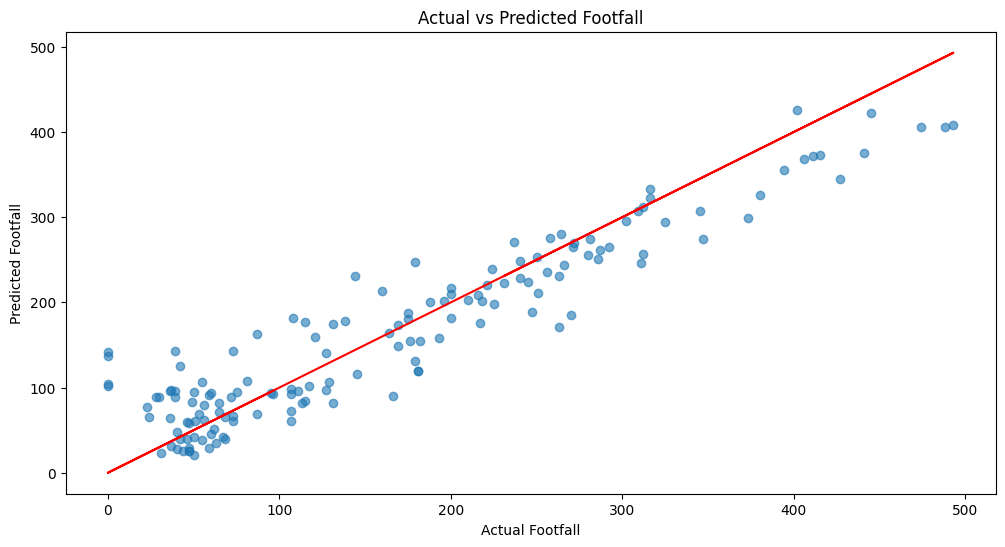

     Actual   Predicted
669      96   92.938995
33       51   60.268707
549      68   39.989536
199     302  295.944702
264      73   60.839352


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Predicting the values using the model
# Replace 'model', 'X_test', and 'y_test' with your actual model and data variables
y_pred = model.predict(X_test).flatten()

# Creating a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mae = np.mean(np.abs(comparison_df['Actual'] - comparison_df['Predicted']))
print("Mean Absolute Error (MAE):", mae)
# Plotting the real values vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.6)
plt.plot(comparison_df['Actual'], comparison_df['Actual'], color='red')
plt.xlabel('Actual Footfall')
plt.ylabel('Predicted Footfall')
plt.title('Actual vs Predicted Footfall')
plt.show()

# Output the DataFrame for further inspection
print(comparison_df.head())


In [10]:
model.save('mae_33_regrssion.h5')  # saves to HDF5 file
model.save_weights('mae_33_weights.h5')
